In [1]:
#Step 1: Importing Required Libraries
import piplite
await piplite.install(['seaborn', 'scikit-learn'])




In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

<ipython-input-2-da606197d11b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
#Step 2: Download the dataset to this lab environmen 
df = pd.read_csv("medical_insurance_dataset.csv")
#print first 5 rows
df.head()


,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


In [4]:
#Step 3: Reload CSV with Correct Headers
column_names=['Age', 'Gender', 'BMI', 'No_Of_Children', 'Smoker', 'Region', 'Charges']
df=pd.read_csv("medical_insurance_dataset.csv" , names=column_names, header =0)
df.head()

,Age,Gender,BMI,No_Of_Children,Smoker,Region,Charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


In [5]:
# Step 4: Check for missing or null values
df.isnull().sum()


Age               0
Gender            0
BMI               0
No_Of_Children    0
Smoker            0
Region            0
Charges           0
dtype: int64

In [6]:
# Step 5: Summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2771 non-null   object 
 1   Gender          2771 non-null   int64  
 2   BMI             2771 non-null   float64
 3   No_Of_Children  2771 non-null   int64  
 4   Smoker          2771 non-null   object 
 5   Region          2771 non-null   int64  
 6   Charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 130.0+ KB


In [7]:
#Step 6:  Clean the Data
#6.1: Filtering rows where the 'Smoker' column has unknown or missing values
df[df['Smoker']=='?']
#6.2: Filtering rows where the 'Age' column has unknown or missing values
df[df['Age']=='?']

# Removing rows where 'Smoker' or 'Age' column has unknown values ('?')
df=df[(df['Smoker']!='?') & (df['Age']!='?')]

df


,Age,Gender,BMI,No_Of_Children,Smoker,Region,Charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
5,46,1,33.440,1,0,4,8240.58960
...,...,...,...,...,...,...,...
2766,47,1,45.320,1,0,4,8569.86180
2767,21,1,34.600,0,0,3,2020.17700
2768,19,2,26.030,1,1,1,16450.89470
2769,23,2,18.715,0,0,1,21595.38229


In [8]:
#Step 7: Convert to Correct Data Types
df['Smoker']= df['Smoker'].astype(int)
df['Age']=df['Age'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2760 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             2760 non-null   int32  
 1   Gender          2760 non-null   int64  
 2   BMI             2760 non-null   float64
 3   No_Of_Children  2760 non-null   int64  
 4   Smoker          2760 non-null   int32  
 5   Region          2760 non-null   int64  
 6   Charges         2760 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 150.9 KB


In [9]:
#Step 8: Exploratory Data Analysis (EDA)
#8.1: Getting summary statistics (mean, count, std, min, max, etc.) for numerical colum
df.describe()


,Age,Gender,BMI,No_Of_Children,Smoker,Region,Charges
count,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000,2760.000000
mean,39.126087,1.507246,30.716757,1.100725,0.203623,2.561594,13273.451270
std,14.090914,0.500038,6.133980,1.214566,0.402765,1.130731,12160.767048
min,18.000000,1.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,26.000000,1.000000,26.220000,0.000000,0.000000,2.000000,4710.601913
50%,39.000000,2.000000,30.495000,1.000000,0.000000,3.000000,9369.615750
75%,51.000000,2.000000,34.800000,2.000000,0.000000,4.000000,16577.779500
max,64.000000,2.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


In [10]:
#Step 9:Regional Distribution of Health Insurance Customers
df['Region'].value_counts()

Region
4    765
3    679
1    659
2    657
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Medical Charges')

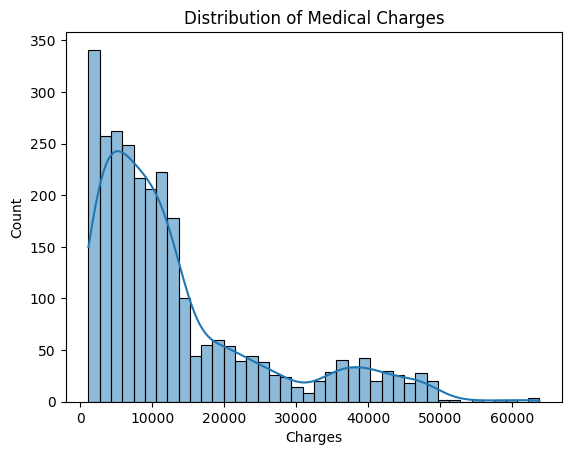

In [13]:
#Step 10: Distribution Plots(To understand the spread of individual numerical columns:)
# 10.1: Distribution of Medical charges
sns.histplot(df['Charges'], bins=40, kde=True)
plt.title("Distribution of Medical Charges")



Text(0.5, 1.0, 'Age Distribution')

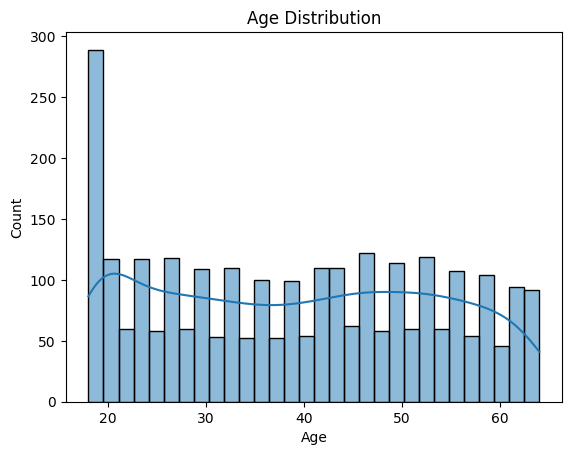

In [14]:
#10.2: Age Distribution
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")


Text(0.5, 1.0, 'BMI Distribution')

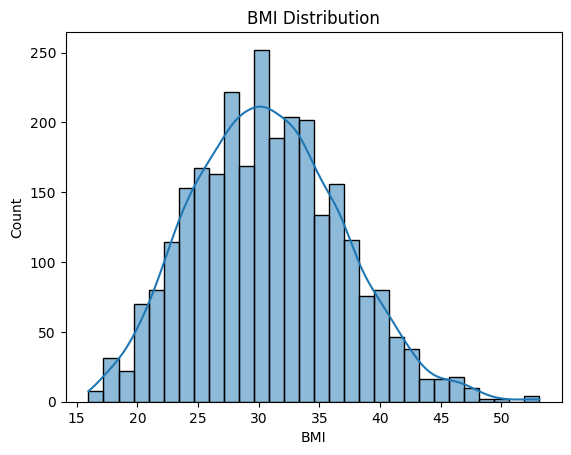

In [15]:
#10.3: BMI Distribution
sns.histplot(df['BMI'], bins=30, kde=True)
plt.title("BMI Distribution")


Text(0.5, 1.0, 'Charges vs. Smoking Status')

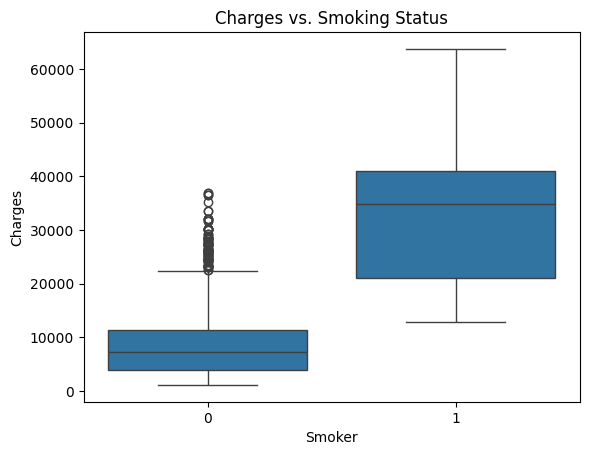

In [16]:
#Step 11:  Box Plots(To detect outliers and compare distributions between groups:)
#11.1: Charges by Smoker
sns.boxplot(x='Smoker', y='Charges', data=df)
plt.title("Charges vs. Smoking Status")


Text(0.5, 1.0, 'Charges by Gender')

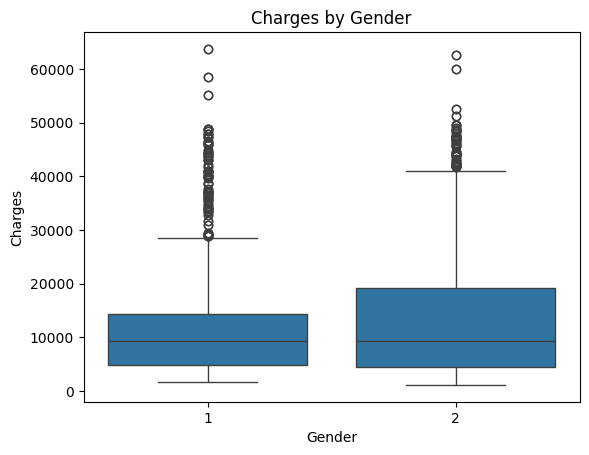

In [17]:
#11.2: Charges by Gender
sns.boxplot(x='Gender', y='Charges', data=df)
plt.title("Charges by Gender")


Text(0.5, 1.0, 'Charges by Region')

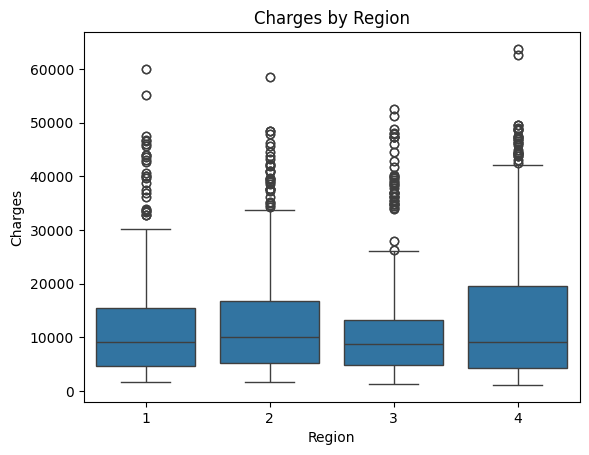

In [18]:
#11.3: Charges by Region

sns.boxplot(x='Region', y='Charges', data=df)
plt.title("Charges by Region")



Text(0.5, 1.0, 'Age vs. Charges (Smoker Highlighted)')

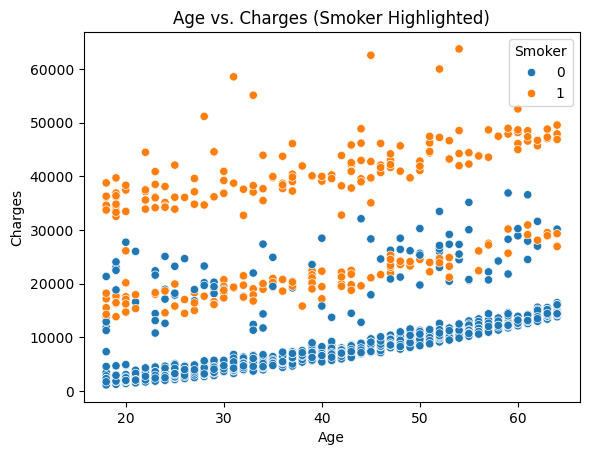

In [19]:
#Step 12: Scatter Plots(To study relationships between numerical variables:)
#12.1: Age vs. Charges
sns.scatterplot(x='Age', y='Charges', hue='Smoker', data=df)
plt.title("Age vs. Charges (Smoker Highlighted)")


Text(0.5, 1.0, 'BMI vs. Charges (Smoker Highlighted)')

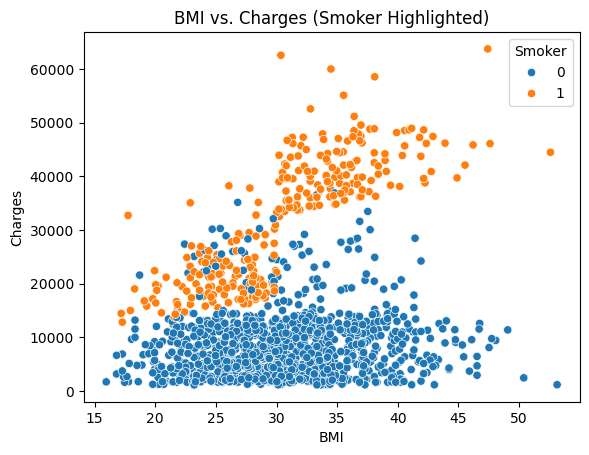

In [20]:
#12.2:BMI vs. Charges
sns.scatterplot(x='BMI', y='Charges', hue='Smoker', data=df)
plt.title("BMI vs. Charges (Smoker Highlighted)")


Text(0.5, 1.0, 'Correlation Heatmap')

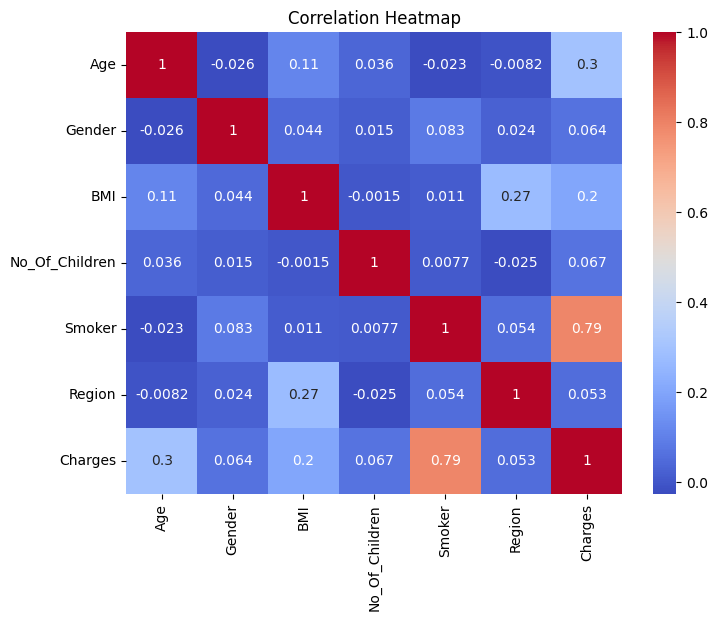

In [21]:
#Step 13:  Correlation Heatmap(To explore how variables are correlated:)
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")


Text(0.5, 1.0, 'Smoker Count')

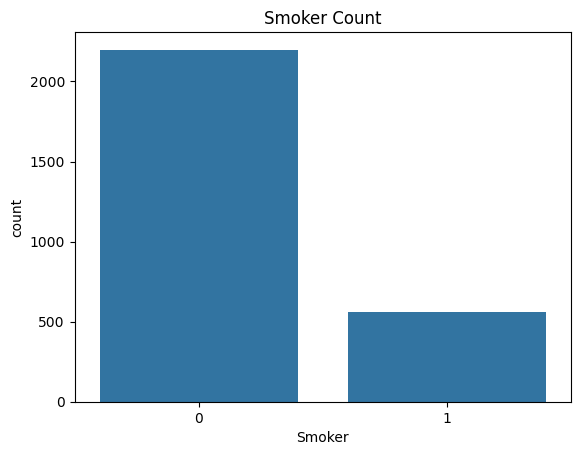

In [22]:
#Step 14:Bar Plots(To compare categories (like count):)
sns.countplot(x='Smoker', data=df)
plt.title("Smoker Count")

